In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [100]:
from sklearn.linear_model import LinearRegression

In [208]:
df_06 = pd.read_csv('datasets/htx_2006_weather.csv', na_values='Blank').dropna()
# df_10 = pd.read_csv('datasets/htx_2010_weather.csv', na_values='Blank').dropna()
# df_11 = pd.read_csv('datasets/htx_2011_weather.csv', na_values='Blank').dropna()
# df_12 = pd.read_csv('datasets/htx_2012_weather.csv', na_values='Blank').dropna() 
# df_13 = pd.read_csv('datasets/htx_2013_weather.csv', na_values='Blank').dropna()
# df_14 = pd.read_csv('datasets/htx_2014_weather.csv', na_values='Blank').dropna()
# df_15 = pd.read_csv('datasets/htx_2015_weather.csv', na_values='Blank').dropna()
# df_18 = pd.read_csv('datasets/htx_2018_weather.csv', na_values='Blank').dropna()
# df_19 = pd.read_csv('datasets/htx_2019_weather.csv', na_values='Blank').dropna()
# df_21 = pd.read_csv('datasets/htx_2021_weather.csv', na_values='Blank').dropna()

# df = pd.concat([df_06, df_10, df_11, df_12, df_13, df_14, df_15, df_18, df_19, df_21])
df = df_06

In [209]:
df

,date,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,rain_today,rain_tomorrow
0,2006-01-01,64.0,81.0,0.0,8.0,14.0,90.0,54.0,29.77,29.65,Cloudy,Partly Cloudy,71.0,81.0,No,No
1,2006-01-02,57.0,79.0,0.0,9.0,10.0,87.0,22.0,29.91,29.89,Partly Cloudy,Fair,63.0,78.0,No,No
2,2006-01-03,49.0,79.0,0.0,0.0,10.0,60.0,24.0,30.07,29.98,Fair,Fair,60.0,79.0,No,No
3,2006-01-04,52.0,76.0,0.0,7.0,7.0,87.0,60.0,30.06,29.97,Mostly Cloudy,Mostly Cloudy,65.0,75.0,No,No
4,2006-01-05,51.0,69.0,0.0,16.0,23.0,42.0,21.0,30.20,30.13,Fair,Fair / Windy,57.0,68.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2006-12-27,36.0,63.0,0.0,6.0,12.0,66.0,43.0,30.16,30.03,Fair,Fair,50.0,63.0,No,No
361,2006-12-28,52.0,71.0,0.0,9.0,16.0,72.0,61.0,29.96,29.89,Mostly Cloudy,Cloudy,64.0,71.0,No,Yes
362,2006-12-29,64.0,73.0,0.2,16.0,18.0,87.0,81.0,29.98,29.86,Cloudy,Cloudy,66.0,71.0,Yes,Yes
363,2006-12-30,54.0,63.0,0.2,5.0,6.0,69.0,60.0,29.98,29.95,Cloudy,Cloudy,60.0,63.0,Yes,No


In [210]:
rainfall = df['rainfall'].to_numpy()


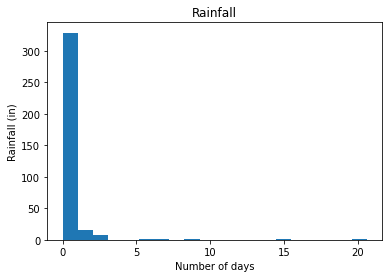

In [211]:
plt.hist(rainfall, bins=20)

plt.xlabel("Number of days")
plt.ylabel("Rainfall (in)")
plt.title("Rainfall")

plt.show()

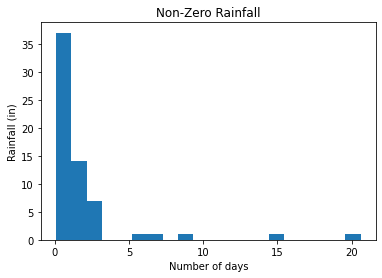

In [212]:
non_zero_rainfall = rainfall[rainfall != 0]
plt.hist(non_zero_rainfall, bins=20)

plt.xlabel("Number of days")
plt.ylabel("Rainfall (in)")
plt.title("Non-Zero Rainfall")

plt.show()

plt.show() 

In [230]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [231]:
test

,date,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,rain_today,rain_tomorrow
348,2006-12-15,62.0,76.0,0.0,6.0,8.0,93.0,68.0,30.00,29.90,Cloudy,Mostly Cloudy,64.0,74.0,No,No
242,2006-08-31,72.0,91.0,0.0,6.0,5.0,49.0,38.0,29.95,29.88,Fair,Fair,83.0,91.0,No,No
213,2006-08-02,77.0,91.0,0.0,12.0,9.0,67.0,55.0,30.01,29.97,Mostly Cloudy,Mostly Cloudy,86.0,91.0,No,Yes
218,2006-08-07,77.0,89.0,0.4,5.0,5.0,70.0,59.0,30.05,30.02,Mostly Cloudy,Mostly Cloudy,84.0,89.0,Yes,No
333,2006-11-30,37.0,73.0,0.0,9.0,22.0,84.0,70.0,29.83,30.05,Mostly Cloudy,Cloudy / Windy,73.0,40.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2006-03-14,55.0,73.0,0.0,17.0,15.0,36.0,17.0,30.21,30.16,Fair,Fair,60.0,73.0,No,No
109,2006-04-20,70.0,85.0,0.0,6.0,13.0,74.0,51.0,29.90,29.79,Mostly Cloudy,Mostly Cloudy,77.0,84.0,No,Yes
276,2006-10-04,71.0,89.0,0.0,5.0,9.0,72.0,46.0,30.10,30.05,Mostly Cloudy,Partly Cloudy,81.0,89.0,No,No
357,2006-12-24,46.0,50.0,0.6,20.0,15.0,86.0,89.0,29.98,29.86,Cloudy,Cloudy,48.0,48.0,Yes,No


In [240]:
x_train = train[['min_temp', 
                'max_temp', 
                # 'wind_speed9am', 
                # 'wind_speed3pm', 
                'humidity9am', 
                'humidity3pm', 
                'pressure9am', 
                'pressure3pm', 
                'temp9am', 
                'temp3pm']]
# x_train = train[['humidity3pm', 'pressure3pm']]

y_train = train[['rainfall']]

In [241]:
x_test = test[['min_temp', 
                'max_temp', 
                # 'wind_speed9am', 
                # 'wind_speed3pm', 
                'humidity9am', 
                'humidity3pm', 
                'pressure9am', 
                'pressure3pm', 
                'temp9am', 
                'temp3pm']]

y_test = test[['rainfall']]

In [242]:
model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression()

In [243]:
# plt.scatter(x_train, y_train,color='g')
# plt.plot(x_train, model.predict(x_train),color='k')

# plt.show()

In [244]:
model.predict(x_test)

array([[2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [4.00000000e-01],
       [2.22044605e-16],
       [7.00000000e-01],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.40000000e+00],
       [2.22044605e-16],
       [3.00000000e-01],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [1.00000000e-01],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [4.00000000e-01],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [2.22044605e-16],
       [9.00000000e-01],
       [2.22044605e-16],
       [2.22044605e-16],


In [245]:
print('R squared: {:.2f}'.format(model.score(x_train,y_train)*100))

R squared: 100.00


In [246]:
print('R squared: {:.2f}'.format(model.score(x_test,y_test)*100))

R squared: 100.00


In [238]:
model.coef_

array([[-4.79408705e-03, -5.53861265e-02, -5.32049921e-03,
         2.38833918e-02, -6.10446671e+00,  2.91179531e+00,
         7.58637228e-03,  9.17918505e-03]])